Rol a desarrollar:

Nuestra PM se dirigió a nosotros con un nuevo ticket de trabajo. Una startup de tecnología está interesada en sumarse al mercado de cursos online, pero de una manera eficiente, por lo que compró datasets de posibles competidores para analizar y sacar conclusiones de los datos recolectados.

Ellos solicitan segmentar los el nivel de ventas según precio, idioma, nivel y rating de cada curso para analizar qué tanto influyen dichas variables en la demanda del producto vendido.

In [1]:
#Importo las librerias que voy a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importo los datasets

In [3]:
coursera_courses = pd.read_csv("C:/Users/franc/OneDrive/Escritorio/HENRY/PI03-Analytics/Datasets/Coursera_courses.csv")

In [4]:
coursera_reviews = pd.read_csv("C:/Users/franc/OneDrive/Escritorio/HENRY/PI03-Analytics/Datasets/Coursera_reviews.csv")

In [5]:
edx = pd.read_csv("C:/Users/franc/OneDrive/Escritorio/HENRY/PI03-Analytics/Datasets/edx_courses.csv")

In [6]:
udemy = pd.read_csv("C:/Users/franc/OneDrive/Escritorio/HENRY/PI03-Analytics/Datasets/udemy_courses.csv")

In [7]:
coursera_reviews[coursera_reviews.duplicated()]

,reviews,reviewers,date_reviews,rating,course_id
31,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
32,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
33,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
34,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
35,"Great course, lectures were straight forward a...",By Samuel D,"Jan 24, 2020",5,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [8]:
#Elimino los duplicados de coursera_reviews
coursera_reviews.drop_duplicates(inplace = True)

In [9]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       519891 non-null  object
 1   reviewers     519947 non-null  object
 2   date_reviews  519947 non-null  object
 3   rating        519947 non-null  int64 
 4   course_id     519947 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.8+ MB


In [10]:
#Veo si Udemy tiene duplicados
udemy[udemy.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [11]:
#Elimino los duplicados de Udemy
udemy.drop_duplicates(inplace = True)

In [12]:
#Filtro los nulos de "reviews" en coursera_reviews con "sin dato"
coursera_reviews["reviews"].fillna("sin dato", inplace = True)

In [13]:
#Veo si edx tiene duplicados
edx[edx.duplicated()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [14]:
edx[edx["title"] == "Introduction to Probability"]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [15]:
#Borro el registro duplicado de edx
edx.drop_duplicates(inplace = True)

In [16]:
edx["price"]

0       FREE-Add a Verified Certificate for $49 USD
1       FREE-Add a Verified Certificate for $49 USD
2       FREE-Add a Verified Certificate for $90 USD
3      FREE-Add a Verified Certificate for $199 USD
4      FREE-Add a Verified Certificate for $249 USD
                           ...                     
970     FREE-Add a Verified Certificate for $25 USD
971    FREE-Add a Verified Certificate for $139 USD
972    FREE-Add a Verified Certificate for $139 USD
973     FREE-Add a Verified Certificate for $25 USD
974     FREE-Add a Verified Certificate for $79 USD
Name: price, Length: 974, dtype: object

In [17]:
#Paso a la columna price de edx a númerico
precios_numericos = []
for i in edx["price"]:
    precios_numericos.append(i[37:-4])

In [18]:
edx["price_int"] = precios_numericos

In [19]:
#Agrego la columna "price_int" con los precios en valor númerico
edx["price_int"] = edx["price_int"].astype(float)

In [20]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               974 non-null    object 
 1   summary             921 non-null    object 
 2   n_enrolled          854 non-null    object 
 3   course_type         974 non-null    object 
 4   institution         974 non-null    object 
 5   instructors         971 non-null    object 
 6   Level               974 non-null    object 
 7   subject             974 non-null    object 
 8   language            974 non-null    object 
 9   subtitles           971 non-null    object 
 10  course_effort       974 non-null    object 
 11  course_length       974 non-null    object 
 12  price               974 non-null    object 
 13  course_description  934 non-null    object 
 14  course_syllabus     417 non-null    object 
 15  course_url          974 non-null    object 
 16  price_in

In [21]:
#Filtro los nulos de la columna n_enrolled
edx["n_enrolled"].fillna("0", inplace = True)

In [22]:
#Le quito la "," a los valores de n_enrolled para luego pasarlos a int
edx["n_enrolled"] = edx["n_enrolled"].str.replace(',','')

In [23]:
#Paso la columna n_enrolled a int
edx["n_enrolled"] = edx["n_enrolled"].astype(int)

In [24]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               974 non-null    object 
 1   summary             921 non-null    object 
 2   n_enrolled          974 non-null    int32  
 3   course_type         974 non-null    object 
 4   institution         974 non-null    object 
 5   instructors         971 non-null    object 
 6   Level               974 non-null    object 
 7   subject             974 non-null    object 
 8   language            974 non-null    object 
 9   subtitles           971 non-null    object 
 10  course_effort       974 non-null    object 
 11  course_length       974 non-null    object 
 12  price               974 non-null    object 
 13  course_description  934 non-null    object 
 14  course_syllabus     417 non-null    object 
 15  course_url          974 non-null    object 
 16  price_in

NIVEL DE VENTAS POR PRECIO EN EDX

In [25]:
edx["n_enrolled"][edx["price_int"].between(272.0, 361.0, inclusive="both")].sum()

1014246

In [26]:
print("El ",round((edx["n_enrolled"][edx["price_int"].between(4.555, 94, inclusive="both")].sum())*100/ edx["n_enrolled"].sum(),1)," por ciento de los clientes de edx hicieron cursos que su certificado vale entre 4.555 y 94 dolares")

El  44.9  por ciento de los clientes de edx hicieron cursos que su certificado vale entre 4.555 y 94 dolares


In [27]:
print("El ",round((edx["n_enrolled"][edx["price_int"].between(94.1,183,inclusive="both")].sum())*100/ edx["n_enrolled"].sum(),1)," por ciento de los clientes de edx hicieron cursos que su certificado vale entre 94.1 y 183 dolares")

El  38.5  por ciento de los clientes de edx hicieron cursos que su certificado vale entre 94.1 y 183 dolares


In [28]:
print("El ",round((edx["n_enrolled"][edx["price_int"].between(183.1,272,inclusive="both")].sum())*100/ edx["n_enrolled"].sum(),1)," por ciento de los clientes de edx hicieron cursos que su certificado vale entre 183.1 y 272 dolares")

El  14.0  por ciento de los clientes de edx hicieron cursos que su certificado vale entre 183.1 y 272 dolares


In [29]:
print("El ",round((edx["n_enrolled"][edx["price_int"].between(272.1,361,inclusive="both")].sum())*100/ edx["n_enrolled"].sum(),1)," por ciento de los clientes de edx hicieron cursos que su certificado vale entre 272.1 y 361 dolares")

El  2.2  por ciento de los clientes de edx hicieron cursos que su certificado vale entre 272.1 y 361 dolares


In [30]:
print("El ",round((edx["n_enrolled"][edx["price_int"].between(361.1,450,inclusive="both")].sum())*100/ edx["n_enrolled"].sum(),1)," por ciento de los clientes de edx hicieron cursos que su certificado vale entre 361.1 y 450 dolares")

El  0.4  por ciento de los clientes de edx hicieron cursos que su certificado vale entre 361.1 y 450 dolares


In [31]:
df1 = edx.groupby(pd.cut(edx["price_int"], 5))["n_enrolled"].sum()

In [32]:
df1 = pd.DataFrame(df1)

In [33]:
df1

,n_enrolled
price_int,
"(4.555, 94.0]",20398776
"(94.0, 183.0]",17480751
"(183.0, 272.0]",6375976
"(272.0, 361.0]",1014246
"(361.0, 450.0]",170560


In [34]:
df1 = df1.reset_index()

In [35]:
df1["percentage"] = round(df1["n_enrolled"] * 100/ edx["n_enrolled"].sum(),1)

In [43]:
#Paso la columna price_int de type category a string
df1["price_int"] = df1["price_int"].astype("str")

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_int   5 non-null      object 
 1   n_enrolled  5 non-null      int32  
 2   percentage  5 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 228.0+ bytes


In [44]:
#Este dataframe me dice cuantas personas se enrrolaron en cada rango de precio de edx, y el porcentaje del total que representan. Datos de EDX
df1

,price_int,n_enrolled,percentage
0,"(4.555, 94.0]",20398776,44.9
1,"(94.0, 183.0]",17480751,38.5
2,"(183.0, 272.0]",6375976,14.0
3,"(272.0, 361.0]",1014246,2.2
4,"(361.0, 450.0]",170560,0.4


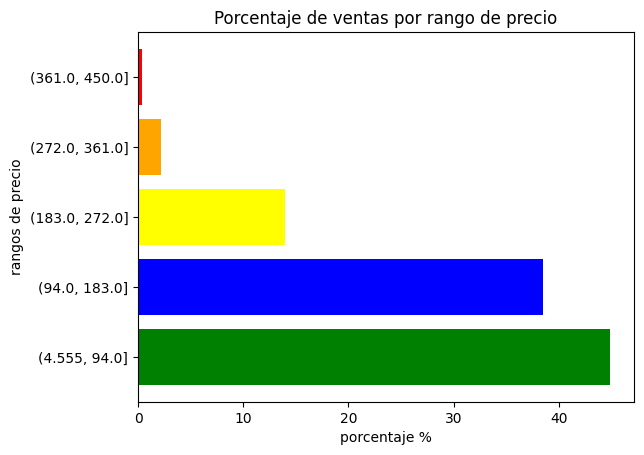

In [63]:
y = list(df1["price_int"])
x = list(df1["percentage"])

plt.barh(y,x, color = ["green","blue","yellow","orange","red"])
plt.title("Porcentaje de ventas por rango de precio")
plt.xlabel("porcentaje %")
plt.ylabel("rangos de precio")
plt.show()

In [38]:
#Exporto df1
df1.to_csv("edx_precios.csv", index = False)

In [39]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               974 non-null    object 
 1   summary             921 non-null    object 
 2   n_enrolled          974 non-null    int32  
 3   course_type         974 non-null    object 
 4   institution         974 non-null    object 
 5   instructors         971 non-null    object 
 6   Level               974 non-null    object 
 7   subject             974 non-null    object 
 8   language            974 non-null    object 
 9   subtitles           971 non-null    object 
 10  course_effort       974 non-null    object 
 11  course_length       974 non-null    object 
 12  price               974 non-null    object 
 13  course_description  934 non-null    object 
 14  course_syllabus     417 non-null    object 
 15  course_url          974 non-null    object 
 16  price_in

NIVEL DE VENTAS DE EDX POR IDIOMA

In [64]:
edx["n_enrolled"].sum()

45440309

In [65]:
edx["language"].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [66]:
print("El",round((edx["n_enrolled"][edx["language"]== "English"].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos en ingles")

El 90.5 por ciento de los clientes de edx toman cursos en ingles


In [67]:
print("El",round((edx["n_enrolled"][edx["language"]== "Español"].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos en Español")

El 8.2 por ciento de los clientes de edx toman cursos en Español


In [68]:
print("El",round((edx["n_enrolled"][(edx["language"] != "English") & (edx["language"] !="Español")].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos en idiomas distintos a español e ingles")

El 1.4 por ciento de los clientes de edx toman cursos en idiomas distintos a español e ingles


In [69]:
edx_idiomas = pd.DataFrame({"idioma":["ingles","español","otro"],
                       "porcentaje":[90.5,8.2,1.4]})

In [70]:
edx_idiomas

,idioma,porcentaje
0,ingles,90.5
1,español,8.2
2,otro,1.4


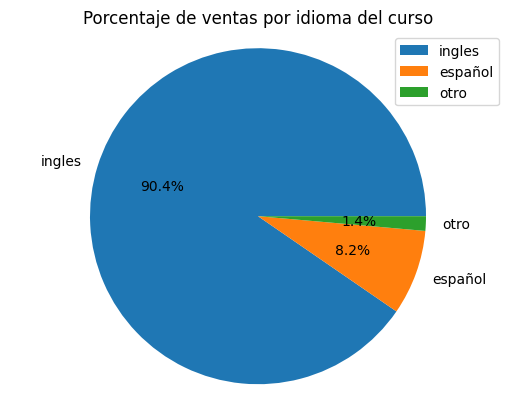

In [73]:
idiomas = list(edx_idiomas["idioma"])
sizes = list(edx_idiomas["porcentaje"])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = idiomas, autopct= "%1.1f%%")
ax1.axis("equal")
plt.title("Porcentaje de ventas por idioma del curso")
plt.legend()
plt.show()

In [71]:
edx_idiomas.to_csv("edx_idiomas.csv", index=False)

NIVEL DE VENTAS DE EDX POR NIVEL 

In [74]:
edx["Level"].value_counts()

Introductory    621
Intermediate    266
Advanced         87
Name: Level, dtype: int64

In [75]:
print("El",round((edx["n_enrolled"][edx["Level"]== "Introductory"].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos de nivel introductorio, son en total:",edx["n_enrolled"][edx["Level"]== "Introductory"].sum())

El 71.3 por ciento de los clientes de edx toman cursos de nivel introductorio, son en total: 32379441


In [76]:
print("El",round((edx["n_enrolled"][edx["Level"]== "Intermediate"].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos de nivel intermedio, son en total:",edx["n_enrolled"][edx["Level"]== "Intermediate"].sum())

El 22.1 por ciento de los clientes de edx toman cursos de nivel intermedio, son en total: 10061847


In [77]:
print("El",round((edx["n_enrolled"][edx["Level"]== "Advanced"].sum() * 100)/ edx["n_enrolled"].sum(),1),"por ciento de los clientes de edx toman cursos de nivel avanzado, son en total:",edx["n_enrolled"][edx["Level"]== "Advanced"].sum())

El 6.6 por ciento de los clientes de edx toman cursos de nivel avanzado, son en total: 2999021


In [78]:
edx_nivel = pd.DataFrame({"nivel":["introductorio","intermedio","avanzado"],
                        "porcentaje":[71.3,22.1,6.6]})

In [79]:
edx_nivel

,nivel,porcentaje
0,introductorio,71.3
1,intermedio,22.1
2,avanzado,6.6


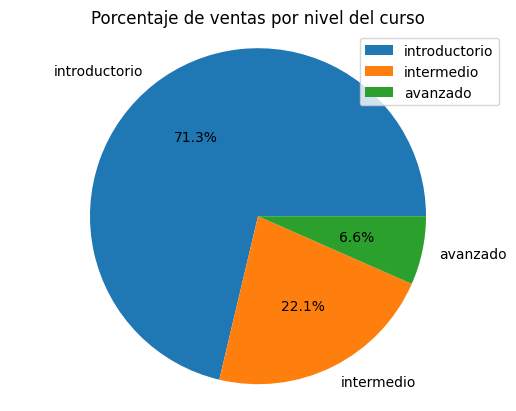

In [81]:
niveles = list(edx_nivel["nivel"])
b = list(edx_nivel["porcentaje"])
fig1, ax1 = plt.subplots()
ax1.pie(b, labels = niveles, autopct= "%1.1f%%")
ax1.axis("equal")
plt.title("Porcentaje de ventas por nivel del curso")
plt.legend()
plt.show()

In [55]:
edx_nivel.to_csv("edx_nivel.csv", index= False)

NIVEL DE VENTAS SEGUN RANGO DE PRECIO DE UDEMY

In [82]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 347.8+ KB


In [83]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [84]:
#Suma total de numeros de suscriptores
udemy["num_subscribers"].sum()

11715835

In [85]:
#Suma total de numero de suscriptores que pagaron para hacer un curso
udemy["num_subscribers"][udemy["is_paid"] == True].sum()

8140310

In [86]:
#Udemy tiene cursos que son gratuitos que no entregan certificado.
print("El total de suscriptores de cursos gratis de Udemy es:", udemy["num_subscribers"][udemy["is_paid"] == False].sum(), "estos representan un:",round(((udemy["num_subscribers"][udemy["is_paid"] == False].sum())/11715835)*100,1), "por ciento del total")

El total de suscriptores de cursos gratis de Udemy es: 3575525 estos representan un: 30.5 por ciento del total


In [87]:
df2 = pd.DataFrame(udemy.groupby(pd.cut(udemy["price"][udemy["is_paid"] == True], 5))["num_subscribers"].sum())

In [88]:
df2

,num_subscribers
price,
"(19.82, 56.0]",2958705
"(56.0, 92.0]",802702
"(92.0, 128.0]",1067603
"(128.0, 164.0]",584622
"(164.0, 200.0]",2726678


In [89]:
df2 = df2.reset_index()

In [90]:
df2["percentage"] = round(df2["num_subscribers"] * 100/ udemy["num_subscribers"][udemy["is_paid"] == True].sum())

In [91]:
#En df2 vemos la cantidad de suscriptores por rango de precios y el porcentaje que representan del total que pagaron para hacer un curso.
df2

,price,num_subscribers,percentage
0,"(19.82, 56.0]",2958705,36.0
1,"(56.0, 92.0]",802702,10.0
2,"(92.0, 128.0]",1067603,13.0
3,"(128.0, 164.0]",584622,7.0
4,"(164.0, 200.0]",2726678,33.0


In [94]:
#Paso la columna price de type category a string
df2["price"] = df2["price"].astype("str")

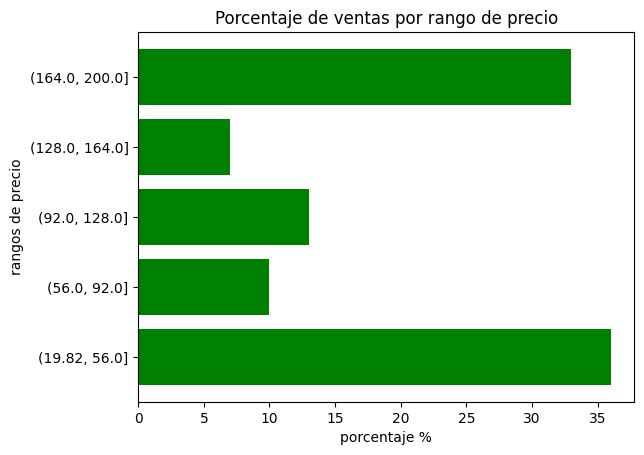

In [96]:
y = list(df2["price"])
x = list(df2["percentage"])

plt.barh(y,x, color = ["green"])
plt.title("Porcentaje de ventas por rango de precio")
plt.xlabel("porcentaje %")
plt.ylabel("rangos de precio")
plt.show()

In [66]:
df2.to_csv("udemy_precios.csv", index=False)

In [97]:
udemy["num_subscribers"][udemy["is_paid"] == True].sum()

8140310

NIVEL DE VENTAS DE UDEMY POR NIVEL

In [98]:
udemy["level"][udemy["is_paid"] == True].value_counts()

All Levels            1803
Beginner Level        1110
Intermediate Level     391
Expert Level            58
Name: level, dtype: int64

In [99]:
#Considero a All Levels como Beginner Level porque si un Beginner Level esta habilitado para hacerlo tambien lo estará alguien con Intermediate 
#o Expert Level pero si el curso seria Intermediate o Expert Level un Beginner Level no estaria habilitado para hacerlo.
print("Cantidad de suscriptores en cursos de nivel Beginner pagos: ",udemy["num_subscribers"][(udemy["level"].isin(["Beginner Level","All Levels"])) & (udemy["is_paid"] == True)].sum())

Cantidad de suscriptores en cursos de nivel Beginner pagos:  7552437


In [100]:
print("Cantidad de suscriptores en cursos de nivel Intermediate pagos:",udemy["num_subscribers"][(udemy["level"]== "Intermediate Level") & (udemy["is_paid"] == True)].sum())

Cantidad de suscriptores en cursos de nivel Intermediate pagos: 537677


In [101]:
print("Cantidad de suscriptores en cursos de nivel Expert pagos:",udemy["num_subscribers"][(udemy["level"]== "Expert Level") & (udemy["is_paid"] == True)].sum())

Cantidad de suscriptores en cursos de nivel Expert pagos: 50196


In [102]:
print("El",round(udemy["num_subscribers"][(udemy["level"].isin(["Beginner Level","All Levels"])) & (udemy["is_paid"] == True)].sum() * 100/ (udemy["num_subscribers"][udemy["is_paid"] == True].sum()),1),"por ciento de los clientes de Udemy compran cursos de nivel introductorio")

El 92.8 por ciento de los clientes de Udemy compran cursos de nivel introductorio


In [103]:
print("El",round(udemy["num_subscribers"][(udemy["level"] == "Intermediate Level") & (udemy["is_paid"] == True)].sum() * 100/ (udemy["num_subscribers"][udemy["is_paid"] == True].sum()),1),"por ciento de los clientes de Udemy compran cursos de nivel Intermediate")

El 6.6 por ciento de los clientes de Udemy compran cursos de nivel Intermediate


In [104]:
print("El",round(udemy["num_subscribers"][(udemy["level"] == "Expert Level") & (udemy["is_paid"] == True)].sum() * 100/ (udemy["num_subscribers"][udemy["is_paid"] == True].sum()),1),"por ciento de los clientes de Udemy compran cursos de nivel Expert")

El 0.6 por ciento de los clientes de Udemy compran cursos de nivel Expert


In [105]:
udemy_nivel = pd.DataFrame({"nivel":["introductorio","intermedio","avanzado"],
"numero_suscriptores":[7552437,537677,50196],
"porcentaje":[92.8,6.6,0.6]})

In [106]:
udemy_nivel

,nivel,numero_suscriptores,porcentaje
0,introductorio,7552437,92.8
1,intermedio,537677,6.6
2,avanzado,50196,0.6


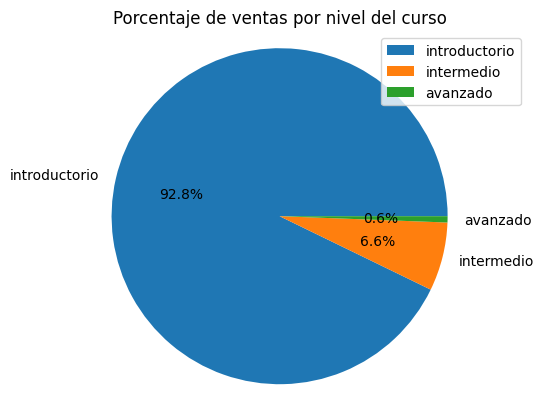

In [107]:
niveles = list(udemy_nivel["nivel"])
b = list(udemy_nivel["porcentaje"])
fig1, ax1 = plt.subplots()
ax1.pie(b, labels = niveles, autopct= "%1.1f%%")
ax1.axis("equal")
plt.title("Porcentaje de ventas por nivel del curso")
plt.legend()
plt.show()

In [77]:
udemy_nivel.to_csv("udemy_nivel.csv", index=False)

NIVEL DE VENTAS DE UDEMY POR IDIOMA

In [108]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


El dataset de Udemy no tiene los idiomas, utilizo langdetect para obtener el idioma en que esta escrito el titulo del curso y por ende el idioma del curso. Esta forma de obtener el idioma no es 100% exacta ya que hay veces que no coincide la detección con el idioma real pero es bastante fiable y me sirve para ver que la gran mayoria de cursos se imparten en ingles.

In [109]:
from langdetect import detect

In [110]:
idiomas = []
for title in udemy["course_title"]:
    idiomas.append(detect(title))

In [111]:
udemy["language"] = idiomas

In [112]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,en
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,en
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,en
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,en
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,en


In [113]:
udemy["language"][udemy["is_paid"] == True].value_counts()

en       2791
es        130
de         85
pt         60
ca         50
fr         43
it         42
no         35
ja         27
tl         19
nl         18
af         10
da          8
ar          7
ro          7
et          5
sv          5
ru          3
zh-cn       3
tr          3
id          2
sw          2
vi          2
hr          2
pl          1
ko          1
th          1
Name: language, dtype: int64

In [114]:
print("El",round((udemy["num_subscribers"][(udemy["is_paid"]== True) & (udemy["language"] == "en")].sum() * 100)/ udemy["num_subscribers"][udemy["is_paid"] == True].sum(),1),"por ciento de los clientes de udemy compraron cursos en ingles")

El 93.4 por ciento de los clientes de udemy compraron cursos en ingles


El 7.1% restante de los clientes de udemy compro cursos que no son en ingles.

In [115]:
udemy_idiomas = pd.DataFrame({"idioma":["ingles","resto"],
                            "porcentaje":[92.8,7.2]})

In [116]:
udemy_idiomas

,idioma,porcentaje
0,ingles,92.8
1,resto,7.2


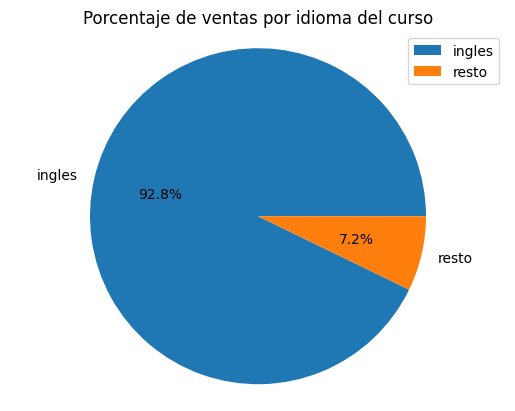

In [117]:
idiomas = list(udemy_idiomas["idioma"])
sizes = list(udemy_idiomas["porcentaje"])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = idiomas, autopct= "%1.1f%%")
ax1.axis("equal")
plt.title("Porcentaje de ventas por idioma del curso")
plt.legend()
plt.show()

In [87]:
udemy_idiomas.to_csv("udemy_idiomas.csv", index = False)

COURSERA

De coursera la información que puedo aproximar es como se segmenta el nivel de ventas por idioma, más del 80 por ciento de los cursos se imparten en ingles por lo que se induce que la mayoria de los cursos vendidos sean en esta lengua.

In [132]:
idiomas_coursera = []
for titulo in coursera_courses["name"]:
    idiomas_coursera.append(detect(titulo))

In [133]:
coursera_courses["language"] = idiomas_coursera

In [134]:
coursera_courses["language"].value_counts()

en    523
es     25
ca     11
fr     11
it     10
de     10
nl      5
no      5
ru      5
tl      4
id      3
ro      3
da      2
lt      2
af      2
pt      2
Name: language, dtype: int64

In [135]:
print("El",round((len(coursera_courses[coursera_courses["language"] == "en"])/ len(coursera_courses))*100,1),"por ciento de los cursos de la plataforma coursera se dictan en ingles")

El 83.9 por ciento de los cursos de la plataforma coursera se dictan en ingles


In [138]:
coursera_idiomas = pd.DataFrame({"idioma":["ingles","resto de idiomas"],
"porcentaje":[83.9,16.1]})

In [139]:
coursera_idiomas

,idioma,porcentaje
0,ingles,83.9
1,resto de idiomas,16.1


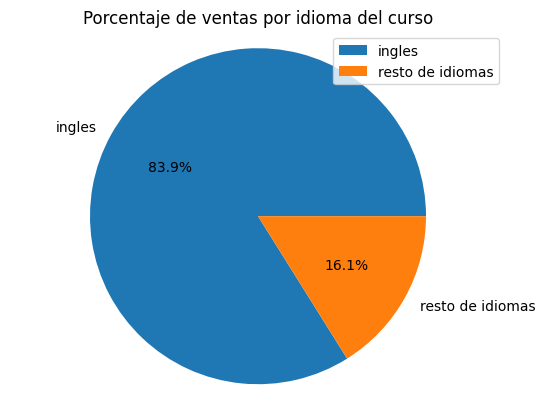

In [140]:
idiomas = list(coursera_idiomas["idioma"])
sizes = list(coursera_idiomas["porcentaje"])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = idiomas, autopct= "%1.1f%%")
ax1.axis("equal")
plt.title("Porcentaje de ventas por idioma del curso")
plt.legend()
plt.show()

In [141]:
coursera_idiomas.to_csv("coursera_idiomas.csv", index = False)

WORDCLOUD

In [96]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,en
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,en
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,en
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,en
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,en


Se nos solicita un WordCloud de las palabras clave que más se repiten dentro del título.

In [92]:
#Primero voy a hacer un dataframe de una columna uniendo las columnas que contienen los titulos de los cursos de cada plataforma.
series1 = pd.Series(coursera_courses["name"])
series2 = pd.Series(edx["title"])
series3 = pd.Series(udemy["course_title"])
df_words = pd.concat([series1, series2, series3], axis = 0)

In [93]:
df_words = pd.DataFrame(df_words, columns = ["titulo"])

In [94]:
df_words

,titulo
0,Machine Learning
1,Indigenous Canada
2,The Science of Well-Being
3,Technical Support Fundamentals
4,Become a CBRS Certified Professional Installer...
...,...
3673,Learn jQuery from Scratch - Master of JavaScri...
3674,How To Design A WordPress Website With No Codi...
3675,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects on Your...


In [95]:
#Genero el texto que tendra todos los titulos, luego lo copio y lo pego en el archivo .txt llamado nube_palabras.txt
texto = " ".join(review for review in df_words.titulo.astype(str))

In [154]:
from wordcloud import WordCloud, STOPWORDS

In [155]:
text = open("nube_palabras.txt", mode= "r", encoding="utf-8").read()

In [156]:
stopwords = STOPWORDS

In [167]:
#Le agregue a stopwords las palabras Learn y Course para que no las tenga en cuenta en la nube
len(stopwords)

194

In [168]:
print(stopwords)

{'my', "weren't", 'on', 'if', 'however', 'then', 'ours', 'com', 'up', 'him', 'other', 'ourselves', 'it', "i've", 'against', "haven't", 'off', 'himself', 'while', "let's", "you'll", 'hence', 'below', 'r', 'an', 'only', 'down', 'herself', 'should', 'were', 'shall', 'between', 'such', 'how', 'with', 'them', 'you', 'can', 'www', "she's", "hadn't", 'themselves', 'again', 'and', 'during', 'further', "they've", "aren't", 'the', 'i', 'have', 'be', 'our', "i'm", 'doing', 'itself', 'as', "we've", 'whom', 'otherwise', 'nor', "i'd", 'by', "shouldn't", 'his', "isn't", 'here', 'Course', 'for', 'would', 'any', 'been', 'than', "there's", "why's", 'that', 'into', 'therefore', 'its', 'before', 'your', "you'd", 'hers', 'no', 'being', 'she', "we'll", 'of', "we'd", "that's", 'some', "who's", "shan't", "she'll", "wasn't", 'ought', "mustn't", 'so', 'yourself', "it's", 'because', "what's", 'each', 'we', "you're", 'or', "don't", 'few', 'from', 'in', "wouldn't", 'having', 'http', 'myself', 'those', 'he', "can't

In [174]:
wc = WordCloud(background_color="white",
stopwords=stopwords,
 width=800, height=400
)

In [175]:
wc.generate(text)

In [176]:
wc.to_file("nube_output.png")